# Problem 1: Data with R

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R

library(tidyverse)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

  warnings.warn(x, RRuntimeWarning)


In [3]:
%%R
# make sure to get your data in the same folder, next to the notebook file
# so that this will run!

dat <- read_csv('classification_data.csv',
                col_types = cols(.default = "d", label="f"))


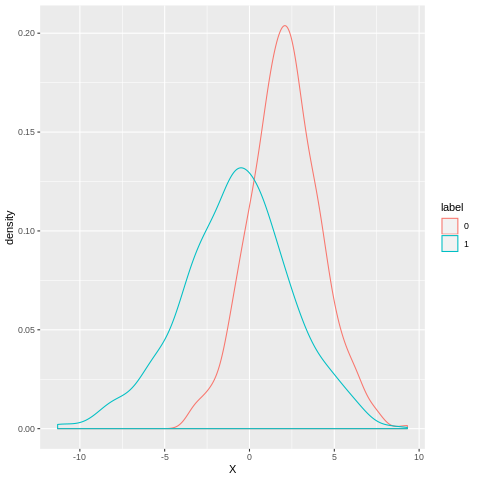

In [4]:
%%R

# Your data consists of an "X" column and a "label" column
# Use ggplot to plot a kernel density estimate of each label (overlayed on the same plot)
# hint: Don't forget to make sure the labels are factors!
# hint hint: Read the errors carefully! 
# Read the documentation for parse_factor (readr) if confused!
ggplot(dat, aes(X, color=label)) + geom_density()


# Problem 2: Using Classes in Python

In this problem, you will use the classes in the following cell. **You do not need to modify the classes or touch the code in the following cell in any way!**

In [5]:
from abc import ABC, abstractmethod
from math import sqrt

def smart_zip(a,b):
    try:
        return zip(a, b)
    except TypeError:
        return zip([a], [b])

class AbstractKNeighbors(ABC):
    def __init__(self, K):
        self.K = K

    def fit(self, X, y):
        """ Train the model!

        X should be a list of data points
        y should be a list of labels
        """
        self.X = X
        self.y = y
        return self

    @abstractmethod
    def _make_prediction(self, labels):
        pass

    def predict(self, new_x):
        """Find the nearest K neighbors
        
        new_x should be a single data point
        """

        dists = [sqrt(sum(([(i-j)**2 for i,j in smart_zip(x,new_x)])))
                 for x in self.X]
        sorted_neighbors = sorted(enumerate(dists),
                                  key=lambda t: t[1])
        labels = [self.y[i] for i,_ in sorted_neighbors]
        return self._make_prediction(labels)


class KNearestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[:self.K])/self.K
        return round(avg)

class KFurthestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[-self.K:])/self.K
        return round(1 - avg)

In [6]:
from csv import reader

with open('classification_data.csv', 'r') as f:
    dat = list(reader(f))[1:]
    dat = [[float(x), int(label)] for x,label in dat]

## Problem 2.1: Shuffling!

In [7]:
import numpy as np
import pandas as pd

In [8]:
np.random.shuffle(dat)

In [9]:
# If you shuffled your data, this test should pass
# (i.e. not throw an error)

assert(sum([label for x,label in dat[:50]]) != 0)

## Problem 2.2: Splitting!

In [10]:
# Split your data, which is now a list, into 2 sublists:
# "train" and "test"
# The "train" group should have 700 elements
# The test group should have 300 elements
# Each group should have the same format as the original data

train = dat[0:700]
test = dat[700:]

print(len(train))
print(len(test))

700
300


In [11]:
# Now you will need to make another split, within the groups!
# For each group ("train" and "test") split the X's from the labels.

train_df = pd.DataFrame(train)
train_df.columns = ["X", "label"]
train_X = train_df.X
train_label = train_df.label

test_df = pd.DataFrame(test)
test_df.columns = ["X", "label"]
test_X = test_df.X
test_label = test_df.label


## Problem 2.3: Testing models!

In [12]:
import datetime

In [14]:
# For each model: 
# 1. Create an instance the class, with constructor parameters: K=5
# 2. Train the instance on the "train" groups X's and labels (y's)
# 3. Test how well the instance does: 
#    A. Use the trained instance to predict the label of each "X" in the "test" group
#    B. Use your "test" labels to see if the predicted label is equal the true label

time_list = list()
iterations = 10
for i in range(0,iterations):
    print(f"Iteration {i}:")
    start_time = datetime.datetime.now()
    model_KNN = KNearestNeighbors(5)
    model_KNN.fit(train_X, train_label)
    sum_test = 0
    for idx, point in enumerate(test_X):
        if test_label[idx] == model_KNN.predict(point):
            sum_test += 1
    print(f"K Nearest Neighbors accuracy\t: \t{sum_test/len(test_X):.6f}")

    model_KFN = KFurthestNeighbors(5)
    model_KFN.fit(train_X, train_label)
    sum_test = 0
    for idx, point in enumerate(test_X):
        if test_label[idx] == model_KFN.predict(point):
            sum_test += 1
    print(f"K Furthest Neighbors accuracy\t: \t{sum_test/len(test_X):.6f}")

    elapsed_time = datetime.datetime.now() - start_time
    time_list.append(elapsed_time)
    print(f"Elapsed time : {elapsed_time}\n")
print(f"Average time : {np.mean(time_list)}")


Iteration 0:
K Nearest Neighbors accuracy	: 	0.666667
K Furthest Neighbors accuracy	: 	0.713333
Elapsed time : 0:00:06.255862

Iteration 1:
K Nearest Neighbors accuracy	: 	0.666667
K Furthest Neighbors accuracy	: 	0.713333
Elapsed time : 0:00:05.503389

Iteration 2:
K Nearest Neighbors accuracy	: 	0.666667
K Furthest Neighbors accuracy	: 	0.713333
Elapsed time : 0:00:05.521248

Iteration 3:
K Nearest Neighbors accuracy	: 	0.666667
K Furthest Neighbors accuracy	: 	0.713333
Elapsed time : 0:00:05.509021

Iteration 4:
K Nearest Neighbors accuracy	: 	0.666667
K Furthest Neighbors accuracy	: 	0.713333
Elapsed time : 0:00:05.513908

Iteration 5:
K Nearest Neighbors accuracy	: 	0.666667
K Furthest Neighbors accuracy	: 	0.713333
Elapsed time : 0:00:05.536924

Iteration 6:
K Nearest Neighbors accuracy	: 	0.666667
K Furthest Neighbors accuracy	: 	0.713333
Elapsed time : 0:00:06.063876

Iteration 7:
K Nearest Neighbors accuracy	: 	0.666667
K Furthest Neighbors accuracy	: 	0.713333
Elapsed time : 

In [15]:
time_list = list()
iterations = 10
for i in range(0,iterations):
    print(f"Iteration {i}:")
    start_time = datetime.datetime.now()

    # Vector driven approach using Pandas dataframes
    model_KNN = KNearestNeighbors(5)
    model_KNN.fit(train_X, train_label)
    test_df["knn_res"] = test_df.X.apply(model_KNN.predict)
    knn_res = ((test_df["knn_res"] == test_df.label).sum()) / test_df.X.shape[0]
    print(f"K Nearest Neighbors accuracy\t: \t{knn_res:.6f}")

    model_KFN = KFurthestNeighbors(5)
    model_KFN.fit(train_X, train_label)
    test_df["kfn_res"] = test_df.X.apply(model_KFN.predict)
    kfn_res = ((test_df["kfn_res"] == test_df.label).sum()) / test_df.X.shape[0]
    print(f"K Furthest Neighbors accuracy\t: \t{kfn_res:.6f}")
    #sum_result = test_df.apply(model_KNN.predict).sum()/test_df.X.shape[0]
    elapsed_time = datetime.datetime.now() - start_time
    time_list.append(elapsed_time)
    print(f"Elapsed time : {elapsed_time}\n")
print(f"Average time : {np.mean(time_list)}")

Iteration 0:
K Nearest Neighbors accuracy	: 	0.666667
K Furthest Neighbors accuracy	: 	0.713333
Elapsed time : 0:00:07.092282

Iteration 1:
K Nearest Neighbors accuracy	: 	0.666667
K Furthest Neighbors accuracy	: 	0.713333
Elapsed time : 0:00:06.221807

Iteration 2:
K Nearest Neighbors accuracy	: 	0.666667
K Furthest Neighbors accuracy	: 	0.713333
Elapsed time : 0:00:06.155322

Iteration 3:
K Nearest Neighbors accuracy	: 	0.666667
K Furthest Neighbors accuracy	: 	0.713333
Elapsed time : 0:00:05.987343

Iteration 4:
K Nearest Neighbors accuracy	: 	0.666667
K Furthest Neighbors accuracy	: 	0.713333
Elapsed time : 0:00:06.159377

Iteration 5:
K Nearest Neighbors accuracy	: 	0.666667
K Furthest Neighbors accuracy	: 	0.713333
Elapsed time : 0:00:05.927045

Iteration 6:
K Nearest Neighbors accuracy	: 	0.666667
K Furthest Neighbors accuracy	: 	0.713333
Elapsed time : 0:00:06.024202

Iteration 7:
K Nearest Neighbors accuracy	: 	0.666667
K Furthest Neighbors accuracy	: 	0.713333
Elapsed time : 

In [16]:
# Compare the two classes of models!
# Depending on the shuffle, the two different algorithms yield different results. Further inverstiagtion
# would be require to determine which in practice is better, though I imagine they are largely comparable.
# I expect k may also play a part.

# Interestingly, the vector driven approach appeared slightly slower than the iterations 
# when I did a simply check of the two though this could be explained by processor load.

In [21]:
import random

In [25]:


with open('classification_data.csv', 'r') as f:
    dat2 = list(reader(f))[1:]
    dat2 = [[float(x), int(label)] for x,label in dat]

In [29]:
for iteration in range(0,2):
    print(f"Iteration {iteration}:")
    start_time = datetime.datetime.now()
    
    dat_shuffle = random.sample(dat2, len(dat2))
    
    train = dat_shuffle[0:700]
    test = dat_shuffle[700:]
    
    train_df = pd.DataFrame(train)
    train_df.columns = ["X", "label"]
    train_X = train_df.X
    train_label = train_df.label

    test_df = pd.DataFrame(test)
    test_df.columns = ["X", "label"]
    test_X = test_df.X
    test_label = test_df.label
    
    # Vector driven approach using Pandas dataframes
    model_KNN = KNearestNeighbors(5)
    model_KNN.fit(train_X, train_label)
    test_df["knn_res"] = test_df.X.apply(model_KNN.predict)
    knn_res = ((test_df["knn_res"] == test_df.label).sum()) / test_df.X.shape[0]
    print(f"K Nearest Neighbors accuracy\t: \t{knn_res:.6f}")

    model_KFN = KFurthestNeighbors(5)
    model_KFN.fit(train_X, train_label)
    test_df["kfn_res"] = test_df.X.apply(model_KFN.predict)
    kfn_res = ((test_df["kfn_res"] == test_df.label).sum()) / test_df.X.shape[0]
    print(f"K Furthest Neighbors accuracy\t: \t{kfn_res:.6f}")
    #sum_result = test_df.apply(model_KNN.predict).sum()/test_df.X.shape[0]
    elapsed_time = datetime.datetime.now() - start_time
    time_list.append(elapsed_time)
    print(f"Elapsed time : {elapsed_time}\n")
print(f"Average time : {np.mean(time_list)}")


Iteration 0:
K Nearest Neighbors accuracy	: 	0.670000
K Furthest Neighbors accuracy	: 	0.650000
Elapsed time : 0:00:05.804613

Iteration 1:
K Nearest Neighbors accuracy	: 	0.650000
K Furthest Neighbors accuracy	: 	0.676667
Elapsed time : 0:00:05.647499

Average time : 0:00:06.193383
